# BASF data challenge 

<img src="basf_retail.jpg">

<font size="2">Image source: https://www.basf.com/no/en/products/packaging-and-print.html</font> 

#### This is the first project notebook on data cleaning & quality.

It contains information on dealing with duplicates, missing and inappropriate values.
We'll take first glance at all variables. Further data exploration will be done in Tableau.

#### Introducing dataset

This dataset contains information of customers and their transactional data. 
Data is collected in 9 months period (from December 2010 up to January 2011). 
  
<br> **Invoice**:   Invoice number (transaction ID) 
<br> **Sales Product**: Data for 3225 products 
<br> **Stock Code** :  Bar code, from product labels in retail store 
<br> **Alpha Code** :  Product alpha numeric code 
<br> **Alpha Code.1**: Shorter alpha numeric code
<br> **Quantity**:  Quantity sold
<br> **Invoice Date**:  Timestamp included on the invoice
<br> **Price per Unit**: Price for one product
<br> **Customer**: Customer name 
<br> **Customer ID**: Unique customer identifier
<br> **Industry**: Industry 
<br> **Country** : Customer country
<br> **Unnamed:12**:  Abbreviation for state
<br> **Distributor**: Yes/No 
<br> **Operating Division**: Consists of 6 BASF divisions 
<br> **Unnamed:15**: Abbreviation for operating division 
<br> **Final Price**: Revenue, price per unit multiplied by the quantity
<br> **Invoice Month**: Month of sale
<br> **Day of week**: Day of sale

#### Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from datetime import datetime
from sklearn.impute import SimpleImputer

%matplotlib inline

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,May,Tuesday
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,December,Wednesday
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,June,Thursday
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,December,Wednesday
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,1.66,December,Wednesday


In [4]:
df.sample(5)

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
64749,562603,C00456 HYALURONIC FS,22951,OTHER LEGACY LYON PR,NSB,1,2011-08-08 10:40,0.55,Alpha Products Aps.,17870,Electrical/Electron,Sweden,SE,Distributor no,INTERMEDIATES,CI,0.55,August,Monday
93593,546927,SOKALAN PA 30 CL,22634,ANIONIC HOMOPOLYMERS,EBC,8,2011-03-18 10:15,9.95,BILLERUDKORSNAS BEET,16672,Construction,Indonesia,ID,Distributor no,INTERMEDIATES,CI,79.60,March,Friday
181763,544666,LUVISKOL VA64 W,21165,PVPS &PVP/VAS,CIC,3,2011-02-22 15:00,1.69,SERGE FERRARI S.A.S.,16907,#,Poland,PL,Distributor no,NUTRITION & HEALTH,EN,5.07,February,Tuesday
63009,542105,A00249 FLAVENGER WP,22961,OTHER LEGACY LYON PR,NSB,6,2011-01-25 13:35,1.45,WIBAX AB,12854,#,Slovenia,SI,Distributor yes,INTERMEDIATES,CI,8.70,January,Tuesday
128645,543028,NITRIC ACID T.P. 60%,22244,NITRIC ACID TECHNICA,6FO,12,2011-02-02 15:09,1.95,PROVIDER IND E COM S,14443,#,Romania,RO,Distributor no,INTERMEDIATES,CI,23.40,February,Wednesday


In [5]:
df.tail()

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
203886,563037,Not assigned,#,LIZENZEINN. STYRODUR,EOB,16,2011-08-11 15:02,1.25,Wolman Wood and Fire,12362,Agriculture,Bulgaria,BG,Distributor no,MONOMERS,CM,20.0,August,Thursday
203887,563094,Not assigned,#,ULF. LICENSES,KWW,4,2011-08-11 17:35,2.95,DANSK VILOMIX A/S,14525,Health,Sweden,SE,Distributor no,PETROCHEMICALS,CP,11.8,August,Thursday
203888,563098,Not assigned,#,VIT. A ANIMAL,EOI,12,2011-08-12 09:14,1.65,Cefak KG,14911,Health,Bulgaria,BG,Distributor no,PETROCHEMICALS,CP,19.8,August,Friday
203889,563203,Not assigned,#,ULD. HISTORY/DELETED,EGN,8,2011-08-14 11:31,8.50,BECA GRAFIC SA,16525,Patent Agent,Czech Republic,CZ,Distributor no,MONOMERS,CM,68.0,August,Sunday
203890,563234,Not assigned,#,LIZENZEINN. STYRODUR,EOB,8,2011-08-15 08:26,1.25,Green Choice s.r.o.,13621,Packaging,Kenya,KE,Distributor yes,NUTRITION & HEALTH,EN,10.0,August,Monday


In [6]:
# Getting all column names 
df.columns

Index(['Invoice', 'Sales Product', 'Stock Code', 'Alpha Code', 'Alpha Code.1',
       'Quantity', 'Invoice Date', 'Price per Unit', 'Customer', 'Customer ID',
       'Industry', 'Country', 'Unnamed: 12', 'Distributor',
       'Operating Division', 'Unnamed: 15', 'Final Price', 'Invoice Month',
       'Day of week'],
      dtype='object')

In [7]:
# Dataset has 203891 rows and 19 columns 
df.shape

(203891, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203891 entries, 0 to 203890
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Invoice             203891 non-null  int64  
 1   Sales Product       203891 non-null  object 
 2   Stock Code          203891 non-null  object 
 3   Alpha Code          203891 non-null  object 
 4   Alpha Code.1        203891 non-null  object 
 5   Quantity            203891 non-null  int64  
 6   Invoice Date        203891 non-null  object 
 7   Price per Unit      203891 non-null  float64
 8   Customer            203891 non-null  object 
 9   Customer ID         203891 non-null  int64  
 10  Industry            203891 non-null  object 
 11  Country             203891 non-null  object 
 12  Unnamed: 12         203891 non-null  object 
 13  Distributor         203891 non-null  object 
 14  Operating Division  203891 non-null  object 
 15  Unnamed: 15         203891 non-nul

In [9]:
# First look at numerical data 
# Numbers at this point may be odd and give us directions for data cleaning
df.describe()

,Invoice,Quantity,Price per Unit,Customer ID,Final Price
count,203891.000000,203891.000000,203891.00000,203891.000000,203891.000000
mean,549651.687814,12.585068,2.90659,15289.184221,23.608508
std,7583.459534,32.840602,2.82691,1727.360851,77.791861
min,536365.000000,1.000000,0.04000,12347.000000,0.100000
25%,543277.000000,2.000000,1.25000,13869.000000,5.000000
50%,549577.000000,6.000000,1.95000,15152.000000,12.600000
75%,556202.000000,12.000000,3.75000,16839.000000,19.800000
max,563237.000000,1056.000000,16.95000,18287.000000,5970.000000


### Data cleaning 

#### Duplicated data

In [10]:
df.duplicated().sum()

2265

In [11]:
df[df.duplicated(keep=False)]

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
81,562204,DISPONIL GL 3060,90209B,FAE TYPES,DRG,1,2011-08-03 12:54,2.07,"LAINCO, S.A.",16324,Agriculture,Czech Republic,CZ,Distributor no,MONOMERS,CM,2.07,August,Wednesday
82,562204,DISPONIL GL 3060,90209B,FAE TYPES,DRG,1,2011-08-03 12:54,2.07,"LAINCO, S.A.",16324,Agriculture,Czech Republic,CZ,Distributor no,MONOMERS,CM,2.07,August,Wednesday
136,554112,DISPONIL ODSLS,90200D,BLENDS & OTHER SURFA,6CB,1,2011-05-22 14:44,4.15,Kluthe Benelux B.V.,17611,Soaps and Detergents,Morocco,MA,Distributor no,NUTRITION & HEALTH,EN,4.15,May,Sunday
137,554112,DISPONIL ODSLS,90200D,BLENDS & OTHER SURFA,6CB,1,2011-05-22 14:44,4.15,Kluthe Benelux B.V.,17611,Soaps and Detergents,Morocco,MA,Distributor no,NUTRITION & HEALTH,EN,4.15,May,Sunday
226,562551,ECOVIO EA 200,90186A,ECOVIO FOAM,LKB,1,2011-08-05 16:19,2.90,DAFA A/S,17231,Health,Sweden,SE,Distributor no,CARE CHEMICALS,EM,2.90,August,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203557,556915,Not assigned,#,OTHER PA 6 MONOMERS,EBN,2,2011-06-15 13:35,6.25,Storit-Werke AG,15036,#,South Korea,KR,Distributor no,CARE CHEMICALS,EM,12.50,June,Wednesday
203799,561026,Not assigned,#,OTHER PA 6 MONOMERS,EBN,1,2011-07-24 10:49,6.25,AB AGRI LIMITED,17265,Construction,Indonesia,ID,Distributor no,PETROCHEMICALS,CP,6.25,July,Sunday
203800,561026,Not assigned,#,OTHER PA 6 MONOMERS,EBN,1,2011-07-24 10:49,6.25,AB AGRI LIMITED,17265,Construction,Indonesia,ID,Distributor no,PETROCHEMICALS,CP,6.25,July,Sunday
203861,562258,Not assigned,#,NONTRADE BUSINESS -,6FJ,1,2011-08-03 15:28,1.25,S. JANSSEN Chemiehan,16348,Construction,Bulgaria,BG,Distributor no,MONOMERS,CM,1.25,August,Wednesday


In [12]:
# Removing duplicates 
df = df.drop_duplicates()

In [13]:
df.shape

(201626, 19)

Data were probably collected from multiple sources, which may cause some duplicates. <br> After removal, dataset has 201626 rows and 19 columns.

#### Missing or invalid values

In [14]:
df.isnull().sum()

Invoice               0
Sales Product         0
Stock Code            0
Alpha Code            0
Alpha Code.1          0
Quantity              0
Invoice Date          0
Price per Unit        0
Customer              0
Customer ID           0
Industry              0
Country               0
Unnamed: 12           0
Distributor           0
Operating Division    0
Unnamed: 15           0
Final Price           0
Invoice Month         0
Day of week           0
dtype: int64

On first, data has no missing values - but we will take a closer look: 

##### Invoice

In [15]:
print("Number of unique invoices:", len(df['Invoice'].unique().tolist()))

Number of unique invoices: 10292


This dataset contains 10292 different transactions. <br> 
Each individual transaction could include a single product, or it could include multiple products. 

##### Sales Product

In [16]:
print("Number of unique sales products:", len(df['Sales Product'].unique().tolist()))

Number of unique sales products: 3225


In [17]:
# Ten best-selling products 
df['Sales Product'].value_counts().head(10)

OASE WHITE ENRICHED     1324
Not assigned            1244
E A C 70 A 10HPM000     1113
CUTINA SHINE             986
DEMELAN 1990             875
E 1195 A 55U000          801
KAURIT GLUE 325 LIQ      790
PBT.NT                   687
N,N-DIMETHYLACETAMID     665
E 794 A 15CS000          637
Name: Sales Product, dtype: int64

We notice 'Not assigned' category high among sales products. This category represents missing data, and it should be imputed or dropped.  

In [18]:
df_copy = df[df['Sales Product'] == 'Not assigned']
df_copy.head()

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
202635,536370,Not assigned,#,BUGR/Not assigned,#,48,2010-12-01 08:45,0.85,ARAUCO ARGENTINA SA,12583,Agriculture,Honduras,HN,Distributor yes,PERFORMANCE MATERIAL,PM,40.80,December,Wednesday
202636,536376,Not assigned,#,TRANSFERS.-UGRU KTU,JVF,48,2010-12-01 09:32,4.25,MORISON PLC,15291,Other,New Zealand,NZ,Distributor no,PETROCHEMICALS,CP,204.00,December,Wednesday
202637,536381,Not assigned,#,NOT ASSIGNED,EFQ,5,2010-12-01 09:41,4.95,UPL SOUTH AFRICA (PT,15311,#,UAE,AE,Distributor no,MONOMERS,CM,24.75,December,Wednesday
202638,536382,Not assigned,#,BUGR/Not assigned,#,12,2010-12-01 09:45,0.85,Benet Automotive s.r,16098,Construction,Kenya,KE,Distributor no,CARE CHEMICALS,EM,10.20,December,Wednesday
202639,536395,Not assigned,#,TRANSFERS.-UGRU KTU,JVF,8,2010-12-01 10:47,4.25,Terramak Laborproduk,13767,#,Bulgaria,BG,Distributor yes,INTERMEDIATES,CI,34.00,December,Wednesday


In [19]:
# Dropping missing values because of the context
df = df[df['Sales Product'] != 'Not assigned']

In [20]:
# Checking the result
df['Sales Product'].value_counts().head(10)

OASE WHITE ENRICHED     1324
E A C 70 A 10HPM000     1113
CUTINA SHINE             986
DEMELAN 1990             875
E 1195 A 55U000          801
KAURIT GLUE 325 LIQ      790
PBT.NT                   687
N,N-DIMETHYLACETAMID     665
E 794 A 15CS000          637
ES 85 A 10 000           612
Name: Sales Product, dtype: int64

##### Stock Code 

Represents scannable bar code, most often printed on product labels.

In [21]:
print("Number of unique stock codes:", len(df['Stock Code'].unique()))

Number of unique stock codes: 3289


Numbers for unique sales product and stock code should match. Is this a data quality issue? 

In [22]:
df2 = df.groupby('Sales Product').apply(lambda x: x['Stock Code'].unique())
df2

Sales Product
 HYDROBLUE® 90           [20679]
 NICOTINAMIDE EP/USP    [47574B]
(R)-1-PHENYLPROPYLAM    [90123D]
(S)-(+)-1-METHOXY-2-    [90123B]
(S)-1-PHENYLETHYLAMI     [84358]
                          ...   
Z-COTE®                  [37500]
ZN-GLYCINATE             [22843]
_LOROL C 16              [20977]
_LOROL C 18              [20985]
_MONOMULS 90-O 18        [21062]
Length: 3224, dtype: object

##### Alpha Code

In [23]:
print("Number of unique Alpha codes:", len(df['Alpha Code'].unique()))

Number of unique Alpha codes: 645


##### Alpha Code.1

In [24]:
print("Number of unique Alpha.1 codes:", len(df['Alpha Code.1'].unique()))

Number of unique Alpha.1 codes: 675


Number of unique values in Alpha Code and Alpha Code.1 also don't completely match.

##### Quantity

Quantity sold 

In [25]:
df["Quantity"].describe()

count    200382.000000
mean         12.684088
std          33.007075
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        1056.000000
Name: Quantity, dtype: float64

We see that that 12 goods are sold on average with standard deviation of approximately 32. <br> Minimum quantity seems ok (1), there are no negative values which may indicate returns. <br> Maximum quantity is 1056, much out of +3SD so it should be investigated.  

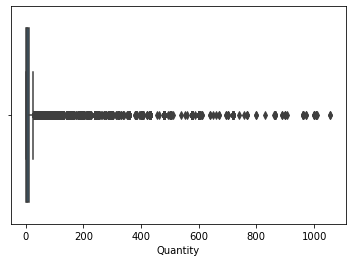

In [26]:
sns.boxplot(x = df['Quantity']);

Quantity probably consists of natural outliers - indicating customers who buy in bulk. We will further investigate this phenomenon when looking at Customer variable. 

##### Invoice Date

Invoice timestamp (Transaction date and time) 
- This format is suitable for analysis in Tableau

In [27]:
# Coverting column from object to datetime64[ns]
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [28]:
print ("Date range goes between", df['Invoice Date'].min(), "and", df['Invoice Date'].max())
# 8,5 consistent months

Date range goes between 2010-12-01 08:26:00 and 2011-08-15 09:57:00


##### Price per Unit    

In [29]:
df["Price per Unit"].describe()

count    200382.000000
mean          2.909292
std           2.828459
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max          16.950000
Name: Price per Unit, dtype: float64

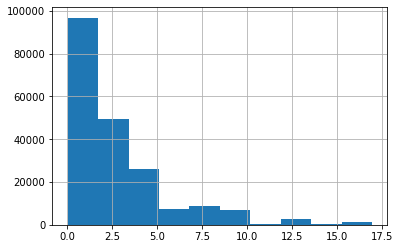

In [30]:
df["Price per Unit"].hist();

In [31]:
# Checking values of skewness and kurtosis
print("Skewness: %f" % df['Price per Unit'].skew())
print("Kurtosis: %f" % df['Price per Unit'].kurt())

Skewness: 2.070299
Kurtosis: 4.909302


Price range goes between 0.04 and 16.95. <br> Price per unit distribution is highly skewed, median will be more useful than mean. 

In [32]:
df['Price per Unit'].median()

1.95

##### Customer & Customer ID

Represents customer name & unique customer code

In [33]:
print("Number of unique customers:", len(df['Customer'].unique().tolist()))

Number of unique customers: 3154


In [34]:
print("Number of unique customer IDs:", len(df['Customer ID'].unique().tolist()))

Number of unique customer IDs: 3169


In [35]:
# Cumulative sum 
(df['Customer'].value_counts()/sum(df['Customer'].value_counts())*100).head(n=15).cumsum()

Permakem AS              1.731193
Cefak KG                 2.998772
SwissCo Services AG      3.875099
SCHATTDECOR DO BRASI     4.739448
UPL SOUTH AFRICA (PT     5.493008
Botanichem CC            6.102844
Safe Pharmaceutical      6.689224
HUNTSMAN QUIMICA BRA     7.234682
TATA STEEL UK LTD        7.750197
Schälchli Chemie Gmb     8.245252
Ovelle Limited           8.674931
UNILEVER ANDINA BOLI     9.056702
ALLINOVA BV              9.431486
ACN KIMYASAL MADDELE     9.806270
EWOS LIMITED            10.148616
Name: Customer, dtype: float64

Only 15 out of 3000+ customers are responsible for 10% of total transactions. These could be wholesale customers who buy bulk goods and store them. Then they sell them to retailers in smaller quantities.

##### Industry

In [36]:
df['Industry'].value_counts()

#                       100265
Construction             18481
Agriculture              16756
Textiles                 13089
Health                   11005
Electrical/Electron       9758
Cosmetics                 7128
Food                      5390
Automotive                5132
Packaging                 4801
Soaps and Detergents      2173
Environment               1652
Furniture                 1581
Private Consumption       1010
Patent Agent              1007
Printing/Graphics         1002
Other                       81
BASF Group Companies        71
Name: Industry, dtype: int64

In [37]:
# Missing values percentage
percent = 100870/len(df)*100

In [38]:
percent

50.33885279116886

Industry column has too many missing data for analysis. We'll drop it at this point, even do it could easily be very significant for future analysis. In case of more time for the project, it would be wise to use domain knowledge (and other columns) to correctly impute missing data. 

In [39]:
# dropping industry column
df = df.drop(['Industry'], axis=1)

##### Country

In [40]:
len(df['Country'].value_counts())

110

In [41]:
# Countries with the most transactions
# Top 10
df['Country'].value_counts().head(10)

Bulgaria          43414
Indonesia         13140
Poland            12311
Czech Republic     9738
South Korea        8789
Romania            8645
Denmark            6432
Morocco            6148
Italy              5505
USA                5215
Name: Country, dtype: int64

In [42]:
# Missing values
len(df[df['Country'] == 'Not assigned'])

37

In [43]:
categorical_imputer = SimpleImputer(missing_values = 'Not assigned', strategy ='most_frequent', fill_value=None, verbose=0, copy=True)

In [44]:
categorical_imputer = categorical_imputer.fit(df['Country'].values.reshape(-1,1))

In [45]:
df['Country'] = categorical_imputer.transform(df['Country'].values.reshape(-1,1))

In [46]:
len(df[df['Country'] == 'Not assigned'])

0

##### Unnamed:12  

This unnamed column stores country abbreviations

##### Distributor

In [47]:
df['Distributor'].unique()

array(['Distributor no', 'Distributor yes', 'Not assigned'], dtype=object)

In [48]:
df['Distributor'].value_counts()

Distributor no     149154
Distributor yes     50722
Not assigned          506
Name: Distributor, dtype: int64

Imputing 'Not assigned' data with the most frequent category: 

In [49]:
categorical_imputer = SimpleImputer(missing_values = 'Not assigned', strategy ='most_frequent', fill_value=None, verbose=0, copy=True)

In [50]:
# Fitting the categorical value
categorical_imputer = categorical_imputer.fit(df['Distributor'].values.reshape(-1,1))

In [51]:
# Transforming and saving result in dataframe
df['Distributor'] = categorical_imputer.transform(df['Distributor'].values.reshape(-1,1))

In [52]:
# Checking the result 
df['Distributor'].value_counts()

Distributor no     149660
Distributor yes     50722
Name: Distributor, dtype: int64

##### Operating Division 

In [53]:
df['Operating Division'].value_counts()

INTERMEDIATES           65047
PERFORMANCE MATERIAL    34818
CARE CHEMICALS          29005
PETROCHEMICALS          27682
MONOMERS                22165
NUTRITION & HEALTH      21665
Name: Operating Division, dtype: int64

Transactions are divided into 6 operating divisions. 

##### Unnamed:15


This unnamed column stores operating division abbreviations

##### Final Price

In [54]:
# Using calculated column to ensure data quality: 
df['Revenue'] = df['Price per Unit'] * df['Quantity']

In [55]:
df = df.drop(['Final Price'], axis=1)

In [56]:
df.head()

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Invoice Month,Day of week,Revenue
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20:00,0.83,SCHATTDECOR DO BRASI,14606,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,May,Tuesday,0.83
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,December,Wednesday,0.83
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08:00,0.83,SCHATTDECOR DO BRASI,14606,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,June,Thursday,0.83
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57:00,0.83,SCHATTDECOR DO BRASI,14606,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,December,Wednesday,0.83
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08:00,0.83,SCHATTDECOR DO BRASI,14606,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,December,Wednesday,1.66


##### Invoice Month 

In [57]:
len(df['Invoice Month'].unique())

9

In [58]:
df['Invoice Month'].unique()

array(['May', 'December', 'June', 'January', 'February', 'March', 'April',
       'July', 'August'], dtype=object)

We have no data for September, October and November.

##### Day of week

In [59]:
# On which day of the week purchase happened
len(df['Day of week'].unique())

6

In [60]:
df['Day of week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Monday', 'Friday'],
      dtype=object)

There were no purchases on Saturdays. Why do we miss that data? 

In [61]:
# Saving csv file for EDA
clean_data = df.to_excel('dataset_clean.xlsx', index=False)

### Future improvements 
- Since this is a small dataset, missing values were mostly handled with SimpleImputer (they were filled with the most frequent category) or simply dropped
- We could improve this process with the use of fancyimpute library and KNN algorithm (imputes variables based on values on nearest neighbours) 
- Industry feature is dropped from the analysis due to the large number of missing values (more than 50%). However, it would probably be valuable to reconstruct values based on other features
- Same minor data quality issues were noticed in variables Sales Products vs Stock Code, which should be further explored. Also, AlphaCode vs AlphaCode.1 relationship stays unknown without the domain knowledge 